In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
rcParams['figure.figsize']=10, 6


a= pd.read_csv("total case for arima.csv")
df=a[1:600]
test=a[601:698]
#new= pd.read_csv("newdata.csv")
print(df.shape)
print(test.shape)

(599, 2)
(92, 2)


In [2]:
X = df.CaseCount.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.137988
p-value: 0.229516
Critical Values:
	1%: -3.442
	5%: -2.867
	10%: -2.569


In [3]:
dff=df.CaseCount[1:499]
dff

2       2
3       2
4       1
5       1
6       1
       ..
495    14
496     9
497    18
498     9
499    22
Name: CaseCount, Length: 498, dtype: int64

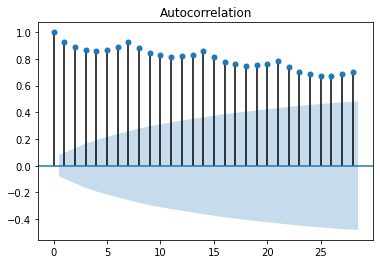

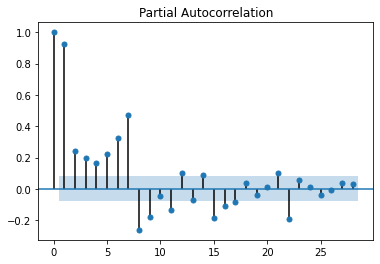

In [4]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df.CaseCount)
pyplot.show()
plot_pacf(df.CaseCount)
pyplot.show()

In [29]:
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to CaseCount dataset , autoarima function choose the paramters between the given range that provides the minimum AIC value.
stepwise_fit = auto_arima(df.CaseCount, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 52, 
                          #m meansThe m parameter relates to the number of observations per seasonal cycle, and is one that must be known apriori. Typically, m will correspond to some recurrent periodicity such as:

#7 - daily
#12 - monthly
#52 - weekly
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,52) [intercept=True]; AIC=4768.718, BIC=4790.231, Time=120.150 seconds
Fit ARIMA(0,1,0)x(0,1,0,52) [intercept=True]; AIC=5085.261, BIC=5093.866, Time=2.367 seconds
Fit ARIMA(1,1,0)x(1,1,0,52) [intercept=True]; AIC=4950.860, BIC=4968.070, Time=44.628 seconds
Fit ARIMA(0,1,1)x(0,1,1,52) [intercept=True]; AIC=4797.753, BIC=4814.963, Time=76.546 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,1,0)x(0,1,0,52) [intercept=False]; AIC=5083.277, BIC=5087.580, Time=2.734 seconds
Fit ARIMA(1,1,1)x(0,1,0,52) [intercept=True]; AIC=5005.049, BIC=5022.259, Time=7.486 seconds
Fit ARIMA(1,1,1)x(1,1,1,52) [intercept=True]; AIC=4770.185, BIC=4796.001, Time=172.018 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 52); setting score to inf (at least one inverse root too close to the border of the u

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  599
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -2379.359
Date:                            Fri, 11 Feb 2022   AIC                           4768.718
Time:                                    13:15:22   BIC                           4790.231
Sample:                                         0   HQIC                          4777.127
                                            - 599                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0290      0.052     -0.559      0.576      -0.130       0.073
ar.L1          0.3071      0.046      6.735      0.000       0.218       0.397
ma.L1         -0.7805      0.032    -24.708      0.000      -0.842      -0.719
ma.S.L52      -0.9999     86.752     -0.012      0.991    -171.030     169.030
sigma2       282.7233   2.45e+04      0.012      0.991   -4.78e+04    4.83e+04
===================================================================================
Ljung-Box (Q):                      698.23   Jarque-Bera (JB):              1464.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.29   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(df.CaseCount,  
                order = (1, 1, 1),  
                seasonal_order =(0, 1, 1, 52)) 
  
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          CaseCount   No. Observations:                  599
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 52)   Log Likelihood               -2304.296
Date:                            Fri, 11 Feb 2022   AIC                           4616.592
Time:                                    14:47:23   BIC                           4633.803
Sample:                                         0   HQIC                          4623.320
                                            - 599                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3172      0.044      7.231      0.000       0.231       0.403
ma.L1         -0.7942      0.031    -25.803      0.000      -0.855      -0.734
ma.S.L52      -0.9998     49.754     -0.020      0.984     -98.517      96.517
sigma2       214.7674   1.07e+04      0.020      0.984   -2.07e+04    2.11e+04
===================================================================================
Ljung-Box (Q):                      707.03   Jarque-Bera (JB):               676.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.54   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

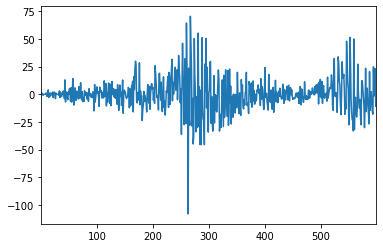

In [6]:
from pandas import DataFrame
residuls=(result.resid)
residuls.plot()

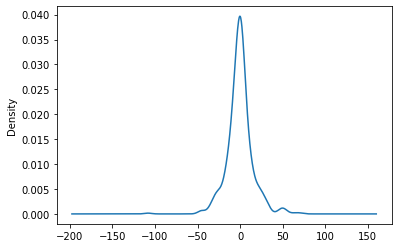

In [7]:
residuls.plot(kind='kde')

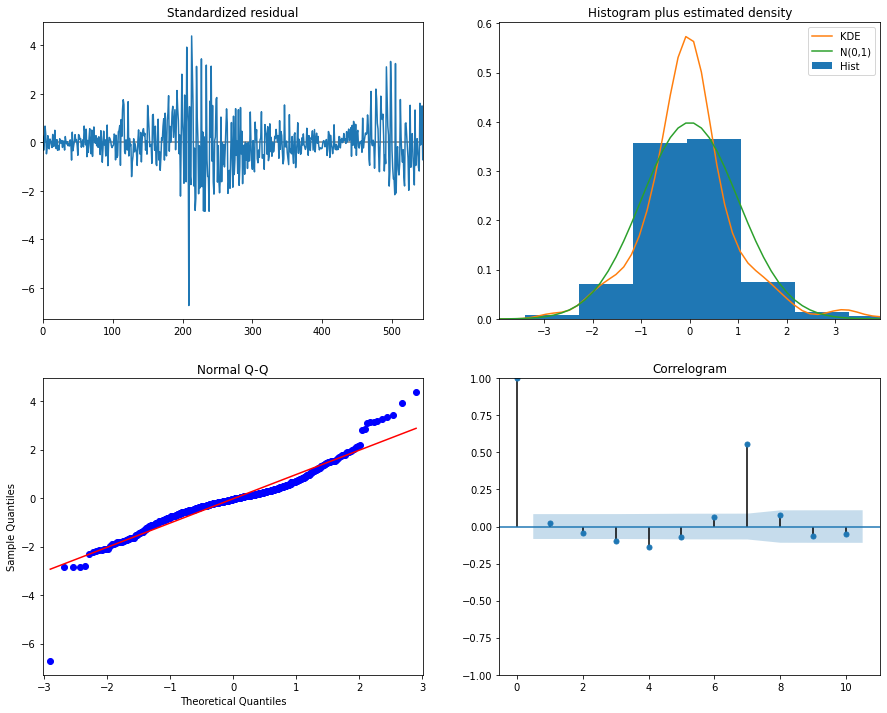

In [8]:
result.plot_diagnostics(figsize=(15, 12))
plt.show()

In [9]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


from math import sqrt
from sklearn.metrics import mean_squared_error
def rmse(predictions, targets): 
    return np.sqrt(((predictions - targets) ** 2).mean())




561    81.399844
562    86.683990
563    84.083319
564    74.627753
565    70.735520
         ...    
689    53.890382
690    57.140264
691    55.973615
692    51.723698
693    49.557090
Name: Predicted values , Length: 133, dtype: float64
mae 82.61052005934093
mape 163.15992971403222
rmse 149.16345207679035
mse_error 22249.735435464932


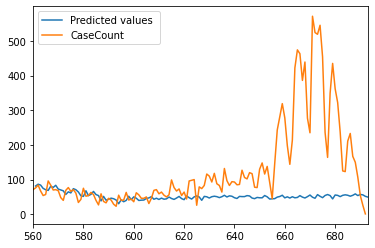

In [14]:
import sys, time
start = 560
end = 692
b= a.CaseCount[560:693]
#start=time.time() 
# Predictions for one-year against the test set 
predictions = result.predict(start, end, 
                             typ = 'levels').rename("Predicted values ") 
#end = time.time()
#print("Time took {:3.4f} s".format((end-start)))
#print(start)
#print(end)  
# plot predictions and actual values 
predictions.plot(legend = True) 
b.plot(legend = True) 
#print(test.CaseCount)
print(predictions)
# Calculate mean squared error 
from sklearn.metrics import mean_absolute_error as mae
mape = mean_absolute_percentage_error(predictions, b)
#calculate MAE
mae=mae(predictions,b)
print('mae',mae)
print('mape',mape)
rmse_error = rmse(predictions,b)
mse_error = rmse_error**2
print('rmse',rmse_error)
print('mse_error',mse_error)

696
696
601     48
602     57
603     53
604     58
605     38
      ... 
693    237
694    206
695    152
696     71
697     32
Name: CaseCount, Length: 97, dtype: int64


AttributeError: 'int' object has no attribute 'CaseCount'

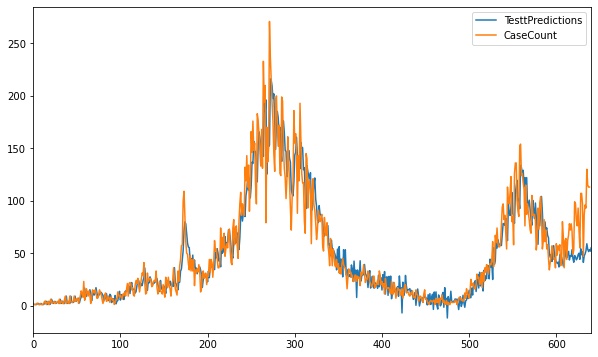

In [54]:
a = len(test)+len(df)
b= len(test)+len(df)
import sys, time

print(a)
print(b)
print(test.CaseCount)

predictionns = result.predict(1,639).rename("TesttPredictions") 
#end = time.time()
#print("Time took {:3.4f} s".format((end-start)))
#print(start)
#print(end)  
# plot predictions and actual values 
# Calculate mean squared error 
#s=mean_squared_error(train.CaseCount, predictionns)
#print(s)
predictionns.plot(legend = True) 
train.CaseCount.plot(legend = True) 

# Calculate mean squared error 
mse=mean_squared_error(a.CaseCount, predictionns)
print(mse)

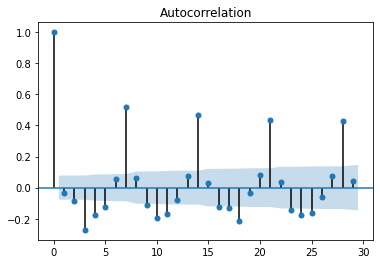

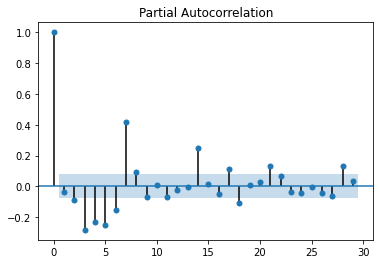

In [12]:
res = result.resid
plot_acf(res)
pyplot.show()
plot_pacf(res)
pyplot.show()


In [13]:
# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(train.CaseCount, predictions) 
  
 

ValueError: operands could not be broadcast together with shapes (639,) (470,) 

In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#mean_value = df1['CaseCount'].mean()
mape = mean_absolute_percentage_error(predictions, train.CaseCount)
print("MAPE",round(mape,4))

ValueError: operands could not be broadcast together with shapes (470,) (639,) 

In [19]:
mae = np.mean(np.abs(predictions - test.CaseCount))    # MAE
mpe = np.mean((predictions -test.CaseCount)/test.CaseCount)   # MPE
rmse = np.mean((predictions -test.CaseCount)**2)**.5
print({ 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

{'mae': 2.029106391345664, 'mpe': 0.02669876830717979, 'rmse': 2.029106391345664}


In [ ]:
# Calculate mean squared error 
mean_squared_error(train.CaseCount, predictions)

In [ ]:
dfsts=df.CaseCount.diff().dropna()


In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(dfsts)
pyplot.show()
plot_pacf(dfsts)
pyplot.show()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(predictions, label="predicted values")
plt.plot(test.CaseCount, label="Actual values" )
plt.legend(loc="upper right")
plt.show()

229
259
229    112
230     95
231     93
232    161
233    167
234    156
235    145
236    164
237    108
238     95
239    205
240    243
241    187
242    182
243    197
244    129
245    140
246    255
247    244
248    251
249    241
250    216
251    141
252    135
253    287
254    280
255    301
256    292
257    295
258    224
Name: CaseCount, dtype: int64
Time took 0.0180 s
1623172497.0772011
1623172497.095191


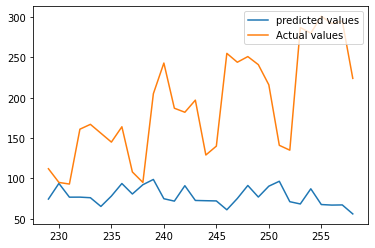

17685.91724862644


In [17]:
startt = len(test)+len(train)
endd = len(test)+len(train) + len(new)
print(startt)
print(endd)
print(new.CaseCount)
# Predictions for one-year against the test set 
start=time.time() 
predictionnns = result.predict(229, 258, typ = 'levels').rename("TestPredictionss") 
  
end = time.time()
print("Time took {:3.4f} s".format((end-start)))
print(start)
print(end)    
    
import matplotlib.pyplot as plt

plt.plot(predictionnns, label="predicted values")
plt.plot(new.CaseCount, label="Actual values" )
plt.legend(loc="upper right")
plt.show() 


# Calculate mean squared error 
s=mean_squared_error(new.CaseCount, predictionnns)
print(s)

In [ ]:
len(predictionns)
len(new)

In [13]:
start# Load specific evaluation tools 
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 
  
# Calculate root mean squared error 
rmse(new.CaseCount, predictionns) 
  

NameError: name 'predictionns' is not defined

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#mean_value = df1['CaseCount'].mean()
mape = mean_absolute_percentage_error(predictionns, new.CaseCount)
print("MAPE",round(mape,4))

In [ ]:
# Calculate mean squared error 
mean_squared_error(new.CaseCount, predictionns)

In [ ]:
mae = np.mean(np.abs(predictionns - new.CaseCount))
mae

In [ ]:
X = df.CaseCount.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))